# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [1]:
# define procedure here
def check_input(arg):
    """
        Param = arg
        a list - preferrably 2D 
        
        Returns bool
        True if the unique vales by set method set() are equal for whole 2D List
        False if otherwise
    """
#     counter variable to check equivalency 
    count = 0
#     iterate over 2D list and copy to a list of unique values
    for x in range(len(arg)):
        res = list(set(arg[x]))
#         Checking 
        if sorted(res) == sorted(arg[x]):
            count += 1

#  Outside the loop we can compare           
    if count is len(arg):
        return True
    return False

In [2]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
True


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [1]:
import pandas as pd
SMS = pd.read_csv('StudentMarkSheet.csv')
SMS.info()
print(sep='\n')
SMS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB



,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
1,Velma Clemons,Biology,05/06/2016,43.0
2,Kibo Underwood,Biology,05/06/2016,81.0
3,Louis Mcgee,Biology,05/06/2016,11.0
4,Phyllis Paul,Biology,05/06/2016,18.0


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [2]:
print (SMS.count())

# subsetting df to get null values and return the columns
print(SMS[SMS.isna().any(axis=1)])

# processing data, dropna drops all null values
SMS = SMS.dropna()
print(SMS.count())

Student name    200
Exam name       199
Exam date       200
Marks           197
dtype: int64
            Student name    Exam name   Exam date  Marks
47           Ryan Herman    Chemistry  15/06/2016    NaN
78         Nelle Skinner  Mathematics  29/07/2016    NaN
104            Myra Wall   Philosophy  02/06/2016    NaN
188  Demetrius Castaneda          NaN  21/06/2016   67.0
Student name    196
Exam name       196
Exam date       196
Marks           196
dtype: int64


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [3]:
# I am writing in broken down structure for simplicity
print('Student name = James Walker\n',
        SMS[SMS['Student name'] == 'James Walker']
              [['Exam name','Marks']]
     )

Student name = James Walker
        Exam name  Marks
0        Biology   31.0
42     Chemistry   61.0
71   Mathematics   23.0
150      Physics  100.0
180    Sociology   73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [43]:
import numpy as np

# We subset each exam_name and then subset its marks into ndarrays
# avg_mark_subject = np.array([
#         SMS[SMS['Exam name'] == 'Biology']['Marks'].mean(),
#         SMS[SMS['Exam name'] == 'Chemistry']['Marks'].mean(),
#         SMS[SMS['Exam name'] == 'Mathematics']['Marks'].mean(),
#         SMS[SMS['Exam name'] == 'Philosophy']['Marks'].mean(),
#         SMS[SMS['Exam name'] == 'Physics']['Marks'].mean(),
#         SMS[SMS['Exam name'] == 'Sociology']['Marks'].mean(), ])

# exam_names = np.array(sorted(list(set(SMS['Exam name']))))

subsets = SMS.groupby(['Exam name'])['Marks'].agg(np.mean)
exam_names, avg_mark_subject = subsets.to_dict().keys(), subsets.to_dict().values()

exam_names = np.array(list(exam_names))
avg_mark_subject = np.array(list(avg_mark_subject))

# Easier way to do this ----^^^

print(avg_mark_subject)
print(exam_names)

[47.89473684 50.57692308 48.97222222 47.27027027 51.76190476 56.02631579]
['Biology' 'Chemistry' 'Mathematics' 'Philosophy' 'Physics' 'Sociology']


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

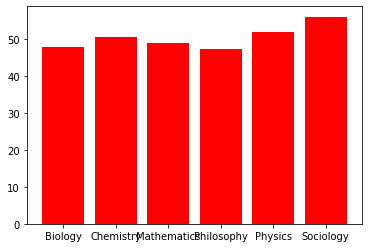

In [41]:
import matplotlib.pyplot as plt

plt.bar(exam_names,avg_mark_subject,color='red')
plt.show()


---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [8]:
CD = pd.read_csv('CatData.csv')
CD.info()
# NO NULL VALUES WERE FOUND

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tail Length (cm)  342 non-null    float64
 1   Mass (kg)         342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


**Part B** - Identify the independant and dependant variables (comment answer below)

In [9]:
# dependant variable: 
# mass
# independant variable: 
# tail length

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [10]:
#Main function to find the coefficients of Line:
def simple_linear_regression(input_feature,output):
    
    Xi = input_feature
    Yi = output
    
    #Total number of data points:
    n = len(Xi)
    
    #X bar:
    Xi_mean = Xi.mean()
    
    #Y bar:
    Yi_mean = Yi.mean()
    
    #Sum of X:
    S_Xi = (Xi).sum()
    
    #Sum of Y:
    S_Yi = (Yi).sum()
    
    #Sum of (X*Y) multiplied by n:
    S_XiYi = ((Xi*Yi).sum())*n
    
    #Sum of X*Sum of Y:
    S_Xi_S_Yi = S_Xi*S_Yi
    
    #Sum of (X*X) multiplied by n:
    S_XiXi = ((Xi*Xi).sum())*n
    
    #Square of sum of X:
    S_Xi_Square = S_Xi*S_Xi
    
    #SLope:
    slope = (S_XiYi- S_Xi_S_Yi) / (S_XiXi-S_Xi_Square)
    
    #Intercept:
    intercept = Yi_mean - slope * Xi_mean
    
    return slope, intercept

ran = int(len(CD)*0.8)
train = CD[:ran]
test = CD[ran:]

actual_slope, actual_intercept = simple_linear_regression(train['Mass (kg)'], train['Tail Length (cm)'])

from sklearn.linear_model import LinearRegression

train_x = np.array(train[['Mass (kg)']])
train_y = np.array(train[['Tail Length (cm)']])

reg = LinearRegression().fit(train_x, train_y)

coeff = reg.coef_
intercept = reg.intercept_




**Part D** - Print the values for slope and y-intercept

In [11]:
print('Slope', coeff)
print('Y-intercept', intercept)

Slope [[1.59183664]]
Y-intercept [13.34657289]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

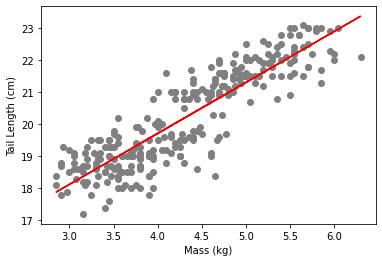

In [12]:
# Original data = most % data alloted = train data

# To match the diagram (scatter plot color) I opened docstring of plt.scatter, and c was the color input parameter
# help(plt.scatter) // plt.scatter.__doc__ 

plt.scatter(train['Mass (kg)'], train['Tail Length (cm)'], c='grey')
plt.plot(train_x, coeff[0]*train_x + intercept, color='red')
plt.xlabel('Mass (kg)'); plt.ylabel('Tail Length (cm)')
plt.show()
# We have acheived a positive correlation which is good result